<a href="https://colab.research.google.com/github/The-bag/CIS-2100-PROJECT-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [43]:
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns


Product Class: Represents a product with a name and price.

Order Class: Represents an order, which contains a list of products. It has methods to add products and calculate the total price of the order.

Customer Class: Represents a customer, who can have multiple orders. It has a method to create a new order.

Store Class: Represents a store that holds customers and records sales data. It can add customers, retrieve them, and record sales with details such as date, time, product, price, etc.

Corporation Class: Represents a corporation with multiple stores, allowing the addition of stores to the corporation.

In [44]:
# Class representing a Product
class Product:
    def __init__(self, name, price):
        self.name = name
        self.price = price

# Class representing an Order, which contains a list of Products
class Order:
    def __init__(self, order_id):
        self.order_id = order_id
        self.products = []

    def add_product(self, product):
        self.products.append(product)

    def total_price(self):
        return sum(product.price for product in self.products)

# Class representing a Customer
class Customer:
    def __init__(self, customer_id):
        self.customer_id = customer_id
        self.orders = []

    def create_order(self, order_id):
        new_order = Order(order_id)
        self.orders.append(new_order)
        return new_order

# Class representing a Store
class Store:
    def __init__(self, store_id):
        self.store_id = store_id
        self.customers = {}

    def add_customer(self, customer):
        self.customers[customer.customer_id] = customer

    def get_customer(self, customer_id):
        return self.customers.get(customer_id)

    def record_sale(self, date, time, customer_id, order):
        global sales_data  # Reference the global sales_data list
        for product in order.products:
            sales_data.append({
                'Date': date,
                'Time': time,
                'StoreID': self.store_id,
                'CustomerID': customer_id,
                'OrderID': order.order_id,
                'ProductName': product.name,
                'Price': product.price
            })

# Class representing the Corporation
class Corporation:
    def __init__(self, corporation_id):
        self.corporation_id = corporation_id
        self.stores = {}

    def add_store(self, store):
        self.stores[store.store_id] = store


Product and Order Creation: Random products (e.g., "Widget", "Gadget") are created with random prices, and random orders are generated for customers.

Customer and Store Simulation: For each store in the corporation, a random customer is either selected or created. A new order is generated for that customer, containing a random number of products.

Sale Recording: The sales data (including date, time, store ID, customer ID, order ID, product name, and price) is recorded and appended to the global sales_data list.


In [45]:
# Global variable to store sales data
sales_data = []

# Helper function to create random data
def create_random_sales_data(corporation, num_sales=100):
    # Create sample products
    product_names = ['Widget', 'Gadget', 'Doodad', 'Thingamajig']
    product_prices = [5.99, 12.49, 7.89, 3.99]

    # A set to keep track of used times
    used_times = set()

    # Generate sales data for each store
    for store_id, store in corporation.stores.items():
        for _ in range(num_sales):
            # Create a random date
            date = datetime(2024, random.randint(1, 12), random.randint(1, 28))

            # Generate a unique random time
            while True:
                random_seconds = random.randint(0, 86399)  # Number of seconds in a day (24*60*60 - 1)
                time = (datetime.min + timedelta(seconds=random_seconds)).time()
                time_str = time.strftime("%H:%M:%S")
                if time_str not in used_times:
                    used_times.add(time_str)
                    break

            # Randomly select a customer or create a new one
            customer_id = random.randint(1, 100)
            customer = store.get_customer(customer_id)
            if not customer:
                customer = Customer(customer_id)
                store.add_customer(customer)

            # Create a new order
            order_id = random.randint(1000, 9999)
            order = customer.create_order(order_id)

            # Add random products to the order
            num_products = random.randint(1, 5)
            for _ in range(num_products):
                product_name = random.choice(product_names)
                product_price = random.choice(product_prices)
                product = Product(product_name, product_price)
                order.add_product(product)

            # Record the sale
            store.record_sale(date, time_str, customer_id, order)



This code creates a Corporation named 'Corp123' with two stores, 'Store001' and 'Store002'. The stores are added to the corporation using the add_store method.

Next, it generates 100 random sales transactions for the corporation using the create_random_sales_data function. This function simulates sales at each store, generating random customer orders, product selections, and recording sales data.








In [46]:
# Create a Corporation with multiple stores
corporation = Corporation('Corp123')
store1 = Store('Store001')
store2 = Store('Store002')

corporation.add_store(store1)
corporation.add_store(store2)

# Create random sales data for the Corporation
create_random_sales_data(corporation, num_sales=100)


This code converts the sales_data (a list of dictionaries) into a Pandas DataFrame, sales_df. It then writes this DataFrame to a CSV file named sales_data.csv without including the index column in the file. This step saves the generated sales data to a CSV file for further analysis or use.








In [47]:
# Convert sales data to a DataFrame and write to a CSV file
sales_df = pd.DataFrame(sales_data)
sales_df.to_csv('sales_data.csv', index=False)


Most Prevalent Products in Customer Baskets:
ProductName
Thingamajig    171
Widget         155
Doodad         151
Gadget         150
Name: count, dtype: int64


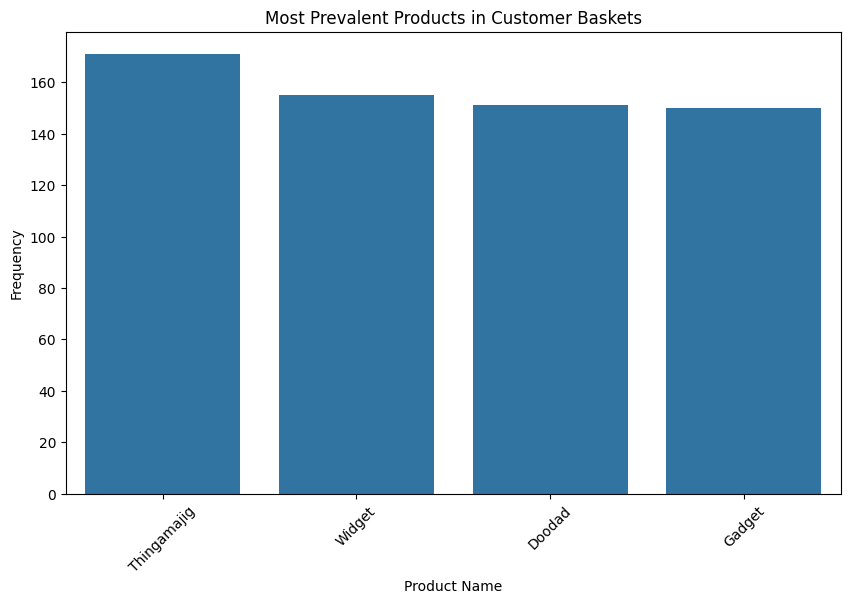

In [48]:
# 1. The most prevalent products in customer baskets
# We'll group by ProductName and count occurrences
product_counts = sales_df['ProductName'].value_counts()

# Display the most prevalent products
print("Most Prevalent Products in Customer Baskets:")
print(product_counts)

# Plot the most prevalent products
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title("Most Prevalent Products in Customer Baskets")
plt.xlabel("Product Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [57]:
# 2. The frequency by which customers were large buyers (i.e., filled up large baskets)
# Define large basket criteria (e.g., orders with 4 or more products)
large_basket_orders = sales_df.groupby('OrderID').size()
large_basket_orders = large_basket_orders[large_basket_orders >= 4]

# Count the frequency of large basket orders per customer
large_basket_customers = sales_df[sales_df['OrderID'].isin(large_basket_orders.index)]
large_basket_customer_counts = large_basket_customers['CustomerID'].value_counts()

# Convert the frequency into a DataFrame for better readability
large_basket_customer_counts_df = large_basket_customer_counts.reset_index()
large_basket_customer_counts_df.columns = ['CustomerID', 'LargeBasketCount']

# Display large basket buyer frequency in rows and columns format
print("Large Basket Buyer Frequency:")
print(large_basket_customer_counts_df)


Large Basket Buyer Frequency:
    CustomerID  LargeBasketCount
0           51                14
1           55                13
2            4                13
3            1                13
4            2                13
5           81                12
6           93                10
7           69                10
8           49                 9
9           24                 9
10          78                 9
11          40                 9
12          90                 8
13          53                 8
14          21                 8
15          97                 8
16          47                 5
17          42                 5
18          59                 5
19          34                 5
20          13                 5
21          20                 5
22          70                 5
23          61                 5
24          35                 5
25          74                 5
26          14                 5
27          57                 5
28          9

Large Basket Buyers by Store:
StoreID
Store001    220
Store002    193
dtype: int64


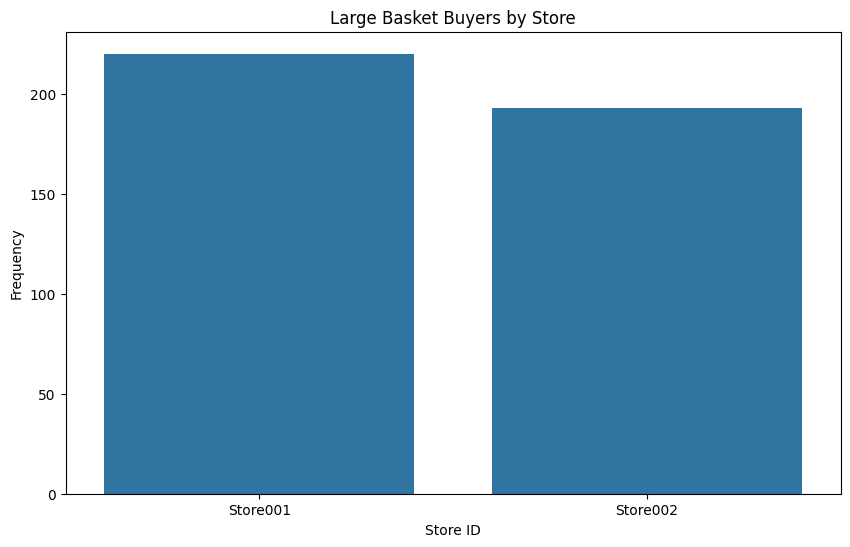

In [50]:
# 3. Which stores contained the large-basket buyers, and by how much
# Merge sales data with large basket orders to determine stores with large-basket buyers
large_basket_store_sales = large_basket_customers.groupby('StoreID').size()

# Display large basket store sales
print("Large Basket Buyers by Store:")
print(large_basket_store_sales)

# Plot the stores with large basket buyers
plt.figure(figsize=(10, 6))
sns.barplot(x=large_basket_store_sales.index, y=large_basket_store_sales.values)
plt.title("Large Basket Buyers by Store")
plt.xlabel("Store ID")
plt.ylabel("Frequency")
plt.show()


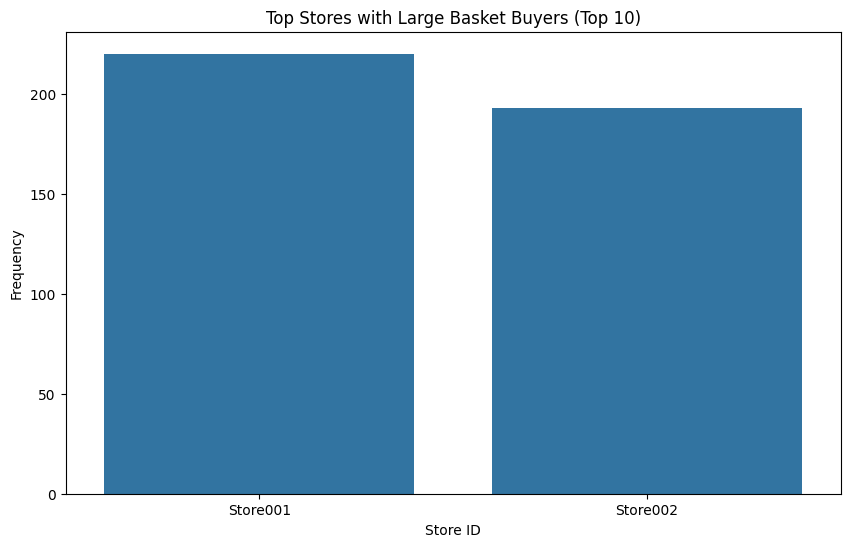

In [51]:
# 4. Visualization ranking the top, large-basket customer stores by frequency
# Top-n stores with large-basket buyers
top_n_stores = large_basket_store_sales.sort_values(ascending=False).head(10)

# Plot the top-n stores with large-basket buyers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_n_stores.index, y=top_n_stores.values)
plt.title("Top Stores with Large Basket Buyers (Top 10)")
plt.xlabel("Store ID")
plt.ylabel("Frequency")
plt.show()


In [52]:
# 5. A top-n list of products typical to customers in the large-basket demographic
# We'll filter the sales data for large-basket orders
large_basket_sales = sales_df[sales_df['OrderID'].isin(large_basket_orders.index)]
top_n_large_basket_products = large_basket_sales['ProductName'].value_counts().head(10)

# Display the top-n products for large-basket customers
print("Top-n Products for Large Basket Customers:")
print(top_n_large_basket_products)


Top-n Products for Large Basket Customers:
ProductName
Thingamajig    115
Widget         107
Gadget          96
Doodad          95
Name: count, dtype: int64


In [53]:
# 6. A categorical approach to the large-basket demographic - Average basket makeup
# We will look at the average number of products per large basket
avg_basket_size = large_basket_orders.mean()
print(f"Average Number of Products per Large Basket: {avg_basket_size:.2f}")


Average Number of Products per Large Basket: 4.49


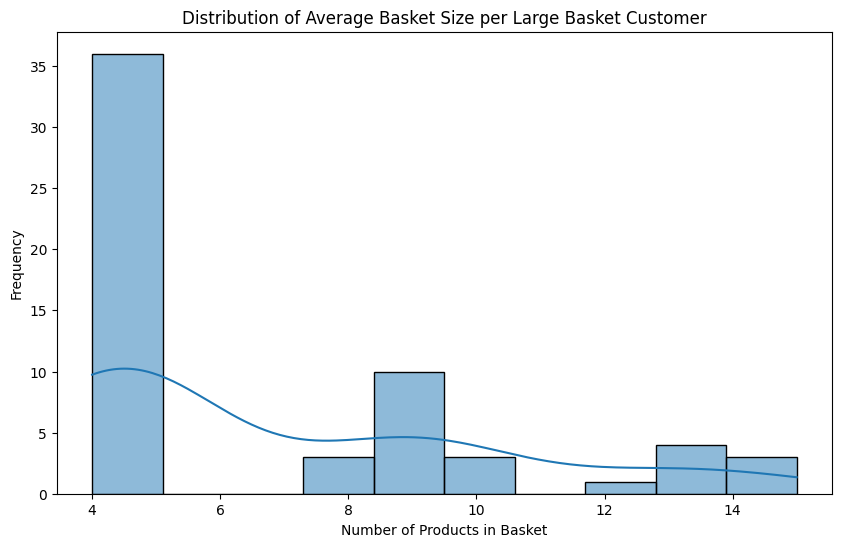

In [54]:
# 7. Visualization for item 6 (Average Basket Size per Customer in Large-Basket Demographic)
avg_basket_size_per_customer = large_basket_customer_counts
plt.figure(figsize=(10, 6))
sns.histplot(avg_basket_size_per_customer, kde=True, bins=10)
plt.title("Distribution of Average Basket Size per Large Basket Customer")
plt.xlabel("Number of Products in Basket")
plt.ylabel("Frequency")
plt.show()
